# Crude Oil Prices: West Texas Intermediate (WTI) - Cushing, Oklahoma
Data source: https://fred.stlouisfed.org/series/DCOILWTICO

In [12]:
import pandas as pd
import seaborn as sns
from datetime import datetime
from dateutil.relativedelta import relativedelta
df = pd.read_csv(f'../data/oil/DCOILWTICO.csv')
# df.columns = [c.lower() for c in df.columns]
# df.columns = ['financial_year', 'qld', 'nsw', 'vic', 'sa', 'tas', 'snowy']

# # Dates are in mixed format
# def parse_date(value: str):
#     try:
#         result = datetime.strptime(value, '%d/%m/%Y %H:%M')
#     except ValueError:
#         result = datetime.strptime(value, '%Y-%m-%d %H:%M:%S')
#     return result

# def fin_year_to_date(value: str):
#     return datetime(int(value[:4]) + 1, 1, 1)

# # df['datetime'] = df['datetime'].apply(parse_date)
# df['quarter'] = df['financial_year'].apply(fin_year_to_date)
# df = df.drop(['financial_year', 'tas', 'snowy'], axis=1).set_index('quarter').drop('2024-01-01').reset_index()
df.columns = ['date', 'oil_price']
df['date'] = pd.to_datetime(df['date'])
df['oil_price'] = pd.to_numeric(df['oil_price'], errors='coerce')
df

,date,oil_price
0,2010-01-04,81.52
1,2010-01-05,81.74
2,2010-01-06,83.12
3,2010-01-07,82.60
4,2010-01-08,82.74
...,...,...
3711,2024-03-26,82.41
3712,2024-03-27,82.15
3713,2024-03-28,83.96
3714,2024-03-29,NaN


In [14]:
def trunc_quarter(value: datetime):
    return datetime(value.year, (value.month - 1) // 3 * 3 + 1, 1)


df['quarter'] = df['date'].apply(trunc_quarter)
df_quarter = df.groupby('quarter').mean(numeric_only=True).reset_index()
df_quarter.to_csv('../data/transformed/oil_prices.csv', index=False)
df_quarter

,quarter,oil_price
0,2010-01-01,78.807049
1,2010-04-01,77.816032
2,2010-07-01,76.062031
3,2010-10-01,85.160469
4,2011-01-01,94.066129
5,2011-04-01,102.021746
6,2011-07-01,89.492969
7,2011-10-01,94.015238
8,2012-01-01,102.984194
9,2012-04-01,93.288730


<Axes: xlabel='quarter', ylabel='oil_price'>

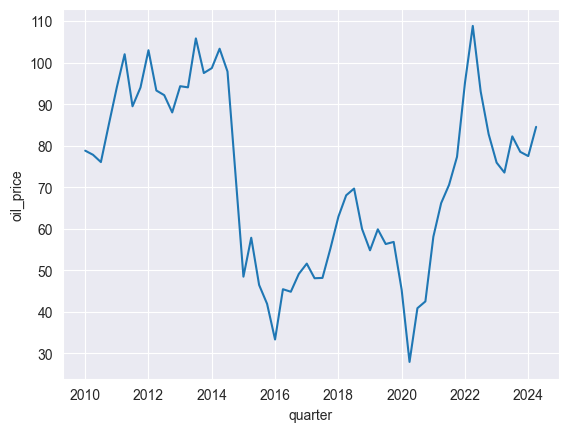

In [15]:
sns.set_style("darkgrid")
sns.lineplot(data=df_quarter, x='quarter', y='oil_price')